In [1]:
import numpy as np
import pandas as pd
import timeit
from pyspark import SparkContext
from pyspark import SQLContext
from PIL import Image
import matplotlib.pyplot as plt
import sys

In [2]:
#from scipy.spatial import distance

In [2]:
sc = SparkContext()

In [3]:
dframe=sc.textFile("data.txt")
data1 =np.loadtxt("data.txt")
data=sc.parallelize(data1)
print(type(data))
#print(data.take(5)[0])

<class 'pyspark.rdd.RDD'>


In [5]:
def euclidean_distance(u,v):
    return np.sqrt(np.sum((u-v)**2))

def manhattan_distance(u,v):
    return np.sum(abs(u-v))

In [6]:
#c2=sc.textFile("data.txt")
c1 =np.loadtxt("c1.txt")
#c1=sc.parallelize(c1)
#print(c1.take(1)[0])
c2=np.loadtxt("c2.txt")

In [7]:
def get_centroid(point,c1,distance):
    #print("hi")
    index=-1
    #cost_list=[]
    #f=open('cost.txt','a')
    closest_point=sys.maxsize
    if distance==True:
        for i in range(len(c1)):
            dist_cal=euclidean_distance(point,c1[i])
            if(dist_cal<closest_point):
                closest_point=dist_cal
                index=i
        return [index,closest_point]
    elif distance==False:
        for i in range(len(c1)):
            dist_cal=manhattan_distance(point,c1[i])
            if(dist_cal<closest_point):
                closest_point=dist_cal
                index=i
        return [index,closest_point]

In [8]:
def kmeans(data,centroids,iterations,euclidean_distance):
    co_list=[]
    for i in range(iterations):
        v=data.map(lambda x : [get_centroid(x,centroids,euclidean_distance),x])
        val=v.map(lambda x : (x[0][0],x[1]))
        if(euclidean_distance==True):
            p=v.map(lambda x : x[0][1]**2).sum()
            print("iteration",i,":",p)
        elif(euclidean_distance==False):
            p=v.map(lambda x : x[0][1]).sum()
            print("iteration",i,":",p)
        co_list.append(p.sum())
        cen=val.groupByKey().sortByKey().mapValues(list)
        c=cen.map(lambda x: np.average(x[1],axis =0))
        centroids = c.collect()
        #print(centroids)
    return co_list

In [10]:
co_list=kmeans(data,c1,20,True)

iteration 0 : 623660345.3064113
iteration 1 : 509862908.29754543
iteration 2 : 485480681.8720078
iteration 3 : 463997011.685013
iteration 4 : 460969266.57299644
iteration 5 : 460537847.98276776
iteration 6 : 460313099.6535457
iteration 7 : 460003523.88940746
iteration 8 : 459570539.3177351
iteration 9 : 459021103.3422907
iteration 10 : 458490656.191981
iteration 11 : 457944232.5879743
iteration 12 : 457558005.1986763
iteration 13 : 457290136.35230225
iteration 14 : 457050555.0595627
iteration 15 : 456892235.61535454
iteration 16 : 456703630.7370333
iteration 17 : 456404203.01897496
iteration 18 : 456177800.5419933
iteration 19 : 455986871.0273458


In [11]:
x=[i for i in range(20)]

In [12]:
x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

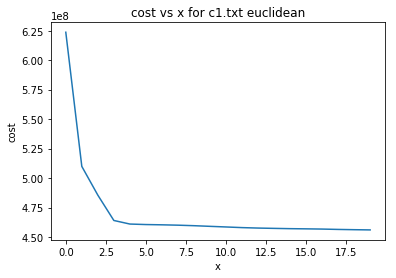

In [13]:
plt.plot(x,co_list)
plt.title("cost vs x for c1.txt euclidean")
plt.xlabel('x')
plt.ylabel('cost')
plt.show()

In [15]:
co_list=kmeans(data,c2,20,True)

iteration 0 : 438747790.02791715
iteration 1 : 249803933.62600312
iteration 2 : 194494814.40631253
iteration 3 : 169804841.45154306
iteration 4 : 156295748.80627602
iteration 5 : 149094208.1089661
iteration 6 : 142508531.6196153
iteration 7 : 132303869.40652972
iteration 8 : 117170969.83719075
iteration 9 : 108547377.17857005
iteration 10 : 102237203.317996
iteration 11 : 98278015.74975672
iteration 12 : 95630226.12177402
iteration 13 : 93793314.05119297
iteration 14 : 92377131.96821079
iteration 15 : 91541606.25423886
iteration 16 : 91045573.83042456
iteration 17 : 90752240.101408
iteration 18 : 90470170.18122728
iteration 19 : 90216416.17563125


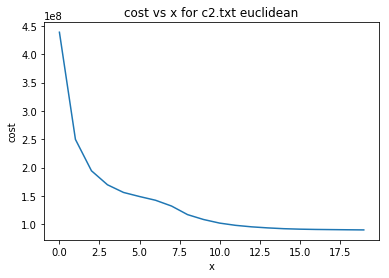

In [16]:
plt.plot(x,co_list)
plt.title("cost vs x for c2.txt euclidean")
plt.xlabel('x')
plt.ylabel('cost')
plt.show()

In [17]:
co_list=kmeans(data,c1,20,False)

iteration 0 : 550117.1420000001
iteration 1 : 464829.2684039454
iteration 2 : 470934.15384668065
iteration 3 : 483874.8162850936
iteration 4 : 489234.23478834564
iteration 5 : 487664.69262679026
iteration 6 : 483718.66592851386
iteration 7 : 475337.9476330569
iteration 8 : 474871.9665496558
iteration 9 : 457244.78974175284
iteration 10 : 447493.1956040524
iteration 11 : 450891.8358047706
iteration 12 : 451232.5774756956
iteration 13 : 451860.12588546483
iteration 14 : 451567.22358914895
iteration 15 : 452710.05209994304
iteration 16 : 453078.2269618496
iteration 17 : 450646.13556209486
iteration 18 : 450419.9701134353
iteration 19 : 449009.59037188475


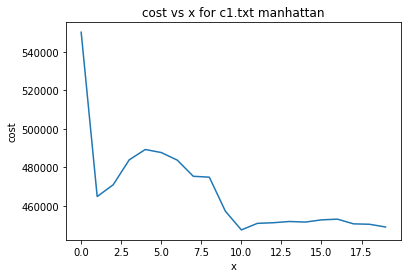

In [18]:
plt.plot(x,co_list)
plt.title("cost vs x for c1.txt manhattan")
plt.xlabel('x')
plt.ylabel('cost')
plt.show()

In [19]:
co_list=kmeans(data,c2,20,False)

iteration 0 : 1433739.310000001
iteration 1 : 1084488.776964879
iteration 2 : 973431.7146620422
iteration 3 : 895934.5925630715
iteration 4 : 865128.3352940823
iteration 5 : 845846.6470313487
iteration 6 : 827219.582756126
iteration 7 : 803590.3456011103
iteration 8 : 756039.517276121
iteration 9 : 717332.9025432302
iteration 10 : 694587.9252526877
iteration 11 : 684444.5019967912
iteration 12 : 674574.747547856
iteration 13 : 667409.4699160272
iteration 14 : 663556.627821503
iteration 15 : 660162.7772287573
iteration 16 : 656041.3222947128
iteration 17 : 653036.7540731605
iteration 18 : 651112.4262522728
iteration 19 : 649689.0131843532


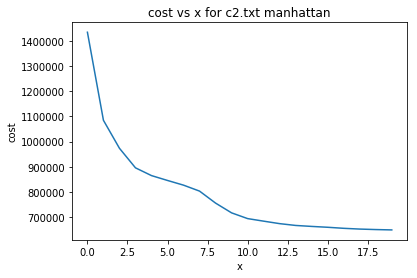

In [20]:
plt.plot(x,co_list)
plt.title("cost vs x for c2.txt manhattan")
plt.xlabel('x')
plt.ylabel('cost')
plt.show()